<a href="https://colab.research.google.com/github/AnSe2002/Project-workshop-on-the-development-of-ETL-solutions/blob/main/4/%D0%9F%D0%A0_2_%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D0%BD%D1%8B%D0%B9_%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D1%83%D0%BC_%D0%BF%D0%BE_%D1%80%D0%B0%D0%B7%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B5_ETL_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9_%D0%A1%D0%B5%D1%80%D0%B3%D0%B5%D0%B5%D0%B2%D0%B0_%D0%90%D0%BD%D0%B0%D1%81%D1%82%D0%B0%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа 2.1. Анализ данных с помощью DASK


**Задание.**

`2.1.1.` Настроить среду и рабочий каталог.

`2.1.2.` Загрузить данные.

`2.1.3.` Проверить качество данных (например, отсутствующие значения и выбросы).

`2.1.4.` Удалить столбцы (множество пропусков в значениях, бесполезные столбцы для анализа).

`2.1.1.` **Настроить среду и рабочий каталог.**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ls

drive/  sample_data/


In [15]:
!pip install "dask[complete]"

In [5]:
# import libraries
import sys
import os

## import dask libraries
import dask.dataframe as dd
from dask.diagnostics import ProgressBar

# import libraries
import pandas as pd

In [6]:
cwd = os.getcwd()

# print
print('', sys.executable)
print('', cwd)

 /usr/bin/python3
 /content


`2.1.2.` **Загрузить данные.**

Разархивирование папки.

In [21]:
!unzip /content/drive/MyDrive/Austin_TX_House_Listings.zip -d /content/drive/MyDrive/Austin_TX_House_Listings

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: /content/drive/MyDrive/Austin_TX_House_Listings/homeImages/29503676_8be8017a2ca32c471b56d2d1ae198130-p_f.jpg  
  inflating: /content/drive/MyDrive/Austin_TX_House_Listings/homeImages/29503683_eb5e01dafac6a58850f24b465577ca36-p_f.jpg  
  inflating: /content/drive/MyDrive/Austin_TX_House_Listings/homeImages/29503701_265d8dfc428daa361e3970404ff30495-p_f.jpg  
  inflating: /content/drive/MyDrive/Austin_TX_House_Listings/homeImages/29503703_9dbc016c6cfd538240e62b236b34f788-p_f.jpg  
  inflating: /content/drive/MyDrive/Austin_TX_House_Listings/homeImages/29503706_212a7a4c3a7ba7b995756b47366589e0-p_f.jpg  
  inflating: /content/drive/MyDrive/Austin_TX_House_Listings/homeImages/29503729_1074abb03870af9bca07cc6d3058befb-p_f.jpg  
  inflating: /content/drive/MyDrive/Austin_TX_House_Listings/homeImages/29503737_5650c82f585867869a73432e63fad4dd-p_f.jpg  
  inflating: /content/drive/MyDrive/Austin_TX_House_Listings/hom

Получение доступа к csv файлу.

In [7]:
csv_path = '/content/drive/MyDrive/Austin_TX_House_Listings/austinHousingData.csv'

df = dd.read_csv(csv_path)
df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


Получение изображений отеля.

In [8]:
# Укажите путь к папке с изображениями
images_folder = '/content/drive/MyDrive/Austin_TX_House_Listings/homeImages/'

# Получаем список файлов изображений
image_files = os.listdir(images_folder)

`2.1.3.` **Проверить качество данных (например, отсутствующие значения и выбросы).**

Проверка пропущенных значений.

In [9]:
# count missing values
missing_values = df.isnull().sum()
missing_values

Dask Series Structure:
npartitions=1
MedianStudentsPerTeacher    int64
zpid                          ...
Dask Name: sum, 5 expressions
Expr=(~ NotNull(frame=ArrowStringConversion(frame=FromMapProjectable(00bfe3f)))).sum()

Расчет процента пропущенных значений.

In [10]:
# calculate percent missing values
mysize = df.index.size
missing_count = ((missing_values / mysize) * 100)
missing_count

Dask Series Structure:
npartitions=1
MedianStudentsPerTeacher    float64
zpid                            ...
Dask Name: mul, 9 expressions
Expr=(~ NotNull(frame=ArrowStringConversion(frame=FromMapProjectable(00bfe3f)))).sum() / Index(frame=ArrowStringConversion(frame=FromMapProjectable(00bfe3f))).size() * 100

In [11]:
# запуск вычисления, используя метод подсчета
with ProgressBar():
  missing_count_percent = missing_count.compute()
missing_count_percent

[########################################] | 100% Completed | 519.52 ms


,0
zpid,0.000000
city,0.000000
streetAddress,0.000000
zipcode,0.000000
description,0.013183
latitude,0.000000
longitude,0.000000
propertyTaxRate,0.000000
garageSpaces,0.000000
hasAssociation,0.000000


Пропущенные значения есть только в поле с описанием description.

`2.1.4.` **Удалить строки с пропущенными значениями.**

In [12]:
# Удаление строк с пропущенными значениями
df_cleaned = df.dropna()

# Проверка первых нескольких строк очищенного DataFrame
df_cleaned.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


Далеее посмотрим на типы данных.

In [13]:
df_cleaned.dtypes

,0
zpid,int64
city,string[pyarrow]
streetAddress,string[pyarrow]
zipcode,int64
description,string[pyarrow]
latitude,float64
longitude,float64
propertyTaxRate,float64
garageSpaces,int64
hasAssociation,bool


Описание полей:

zpid (int64): Уникальный идентификатор конкретного объекта недвижимости.

city (string[pyarrow]): Название города, в котором находится объект недвижимости.

streetAddress (string[pyarrow]): Полный адрес объекта недвижимости.

zipcode (int64): Почтовый индекс.

description (string[pyarrow]): Описание объекта недвижимости.

latitude (float64): Географическая широта расположения объекта недвижимости.

longitude (float64): Географическая долгота расположения объекта недвижимости.

propertyTaxRate (float64): Ставка налога на недвижимость, применяемая к объекту.

garageSpaces (int64): Количество мест для парковки автомобилей в гараже.

hasAssociation (bool): Логическое значение, указывающее на наличие ассоциации собственников жилья.

hasCooling (bool): Указывает, есть ли у недвижимости система кондиционирования воздуха.

hasGarage (bool): Указывает, есть ли у объекта недвижимости гараж.

hasHeating (bool): Указывает, есть ли у недвижимости система отопления.

hasSpa (bool): Указывает, есть ли у объекта недвижимости спа.

hasView (bool): Указывает, есть ли у недвижимости вид.

homeType (string[pyarrow]): Тип недвижимости.

parkingSpaces (int64): Общее количество мест для парковки, доступных для объекта недвижимости.

yearBuilt (int64): Год постройки объекта недвижимости.

latestPrice (float64): Последняя известная цена объекта недвижимости.

numPriceChanges (int64): Количество изменений цен для данного объекта недвижимости.

latest_saledate (string[pyarrow]): Дата последней продажи объекта недвижимости.

latest_salemonth (int64): Месяц последней продажи объекта недвижимости.

latest_saleyear (int64): Год последней продажи объекта недвижимости.

latestPriceSource (string[pyarrow]): Источник последней известной цены объекта недвижимости.

numOfPhotos (int64): Количество доступных фотографий для объекта недвижимости.

numOfAccessibilityFeatures (int64): Количество доступных характеристик для людей с ограниченными возможностями.

numOfAppliances (int64): Количество бытовых приборов, доступных в объекте.

numOfParkingFeatures (int64): Количество функций, связанных с парковкой, известных для объекта недвижимости.

numOfPatioAndPorchFeatures (int64): Количество характеристик патио и веранд, присущих объекту недвижимости.

numOfSecurityFeatures (int64): Количество функций безопасности, доступных для данного объекта.

numOfWaterfrontFeatures (int64): Количество характеристик, связанных с водоемами.

numOfWindowFeatures (int64): Количество характеристик окон.

numOfCommunityFeatures (int64): Количество характеристик сообщества, связанных с объектом.
lotSizeSqFt (float64): Размер земельного участка в квадратных футах.

livingAreaSqFt (float64): Площадь жилого помещения в квадратных футах.

numOfPrimarySchools (int64): Количество начальных школ в радиусе действия от объекта недвижимости.

numOfElementarySchools (int64): Количество начальных школ в радиусе действия от объекта недвижимости.

numOfMiddleSchools (int64): Количество средних школ в радиусе действия от объекта недвижимости.

numOfHighSchools (int64): Количество старших школ в радиусе действия от объекта недвижимости.

avgSchoolDistance (float64): Среднее расстояние до ближайшей школы в милях или километрах.

avgSchoolRating (float64): Средний рейтинг школ в окрестностях объекта недвижимости.

avgSchoolSize (int64): Среднее количество учащихся в школах в окрестностях.

MedianStudentsPerTeacher (int64): Среднее количество учащихся на одного учителя в окрестных школах.

numOfBathrooms (float64): Общее количество ванных комнат в объекте недвижимости.

numOfBedrooms (float64): Общее количество спален в объекте недвижимости.

numOfStories (int64): Количество этажей в здании.

homeImage (string[pyarrow]): Путь к изображению дома.

По итогу необходимо только поменять поля с датой.

In [14]:
df_cleaned['latest_saledate'] = dd.to_datetime(df_cleaned['latest_saledate'])

# Проверяем измененный тип данных
print(df_cleaned['latest_saledate'].dtype)

datetime64[ns]


Далее смотрим на дубли.

In [15]:
# Удаление дубликатов
df_dropped = df_cleaned.drop_duplicates()

df_dropped.compute()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,29512934,austin,905 Silcantu Dr,78748,Not for rent! Beautiful one story home in Tex...,30.161997,-97.816345,1.98,6,False,...,1,1,0.900000,3.333333,1424,14,2.0,3,1,29512934_ff9b6eefa7e2eb4e9ef983da13a23098-p_f.jpg
15167,241937773,austin,1413 Waterloo Shore Ln UNIT 12,78741,This contemporary three-story detached condo h...,30.240223,-97.772835,1.98,2,True,...,1,1,1.900000,6.666667,1226,16,4.0,3,3,241937773_66d3e483bd783eac5a52ff5f938d2a2e-p_f...
15168,29473281,austin,2206 S 3rd St,78704,Original bungalow with a modern addition. Larg...,30.244835,-97.761124,1.98,2,False,...,1,1,0.800000,5.000000,889,13,3.0,3,2,29473281_9e90ec4652c4b3b6592a7fdd09f1ea6d-p_f.jpg
15169,29392029,austin,2000 Chestnut Ave,78722,So many options at this address in the eclecti...,30.281569,-97.717789,1.98,0,False,...,1,1,1.300000,6.666667,1057,15,2.0,4,1,29392029_a9a8306ea363d23f37d91d37975a1b96-p_f.jpg


Следующий шаг - объединение данных.

In [16]:
# Добавляем новый столбец с полным путем к изображению
df_dropped['image_path'] = df_dropped['homeImage'].apply(
    lambda x: os.path.join(images_folder, x) if pd.notna(x) and x in image_files else None,
    meta=('x', 'object'))

print(df_dropped.head())

         zpid          city          streetAddress  zipcode  \
0   111373431  pflugerville   14424 Lake Victor Dr    78660   
1   120900430  pflugerville     1104 Strickling Dr    78660   
2  2084491383  pflugerville    1408 Fort Dessau Rd    78660   
3   120901374  pflugerville     1025 Strickling Dr    78660   
4    60134862  pflugerville  15005 Donna Jane Loop    78660   

                                         description   latitude  longitude  \
0  14424 Lake Victor Dr, Pflugerville, TX 78660 i...  30.430632 -97.663078   
1  Absolutely GORGEOUS 4 Bedroom home with 2 full...  30.432673 -97.661697   
2  Under construction - estimated completion in A...  30.409748 -97.639771   
3  Absolutely darling one story home in charming ...  30.432112 -97.661659   
4  Brimming with appeal & warm livability! Sleek ...  30.437368 -97.656860   

   propertyTaxRate  garageSpaces  hasAssociation  ...  numOfHighSchools  \
0             1.98             2            True  ...                 1   
1 

Был добавлен столбец с путем к изображениям на диске. Если название находится в списке изображений, то фиксируется путь к изображению, если нет, то пишется None.

Pillow — это библиотека для обработки изображений в Python, которая позволяет загружать, отображать и изменять изображения.

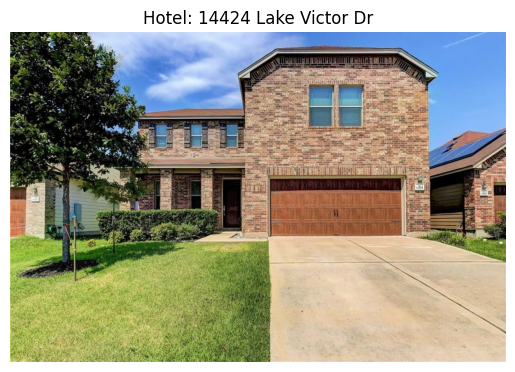

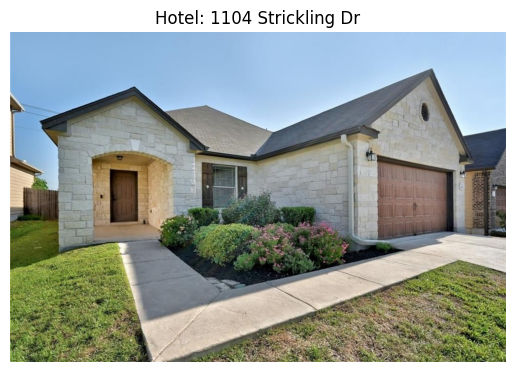

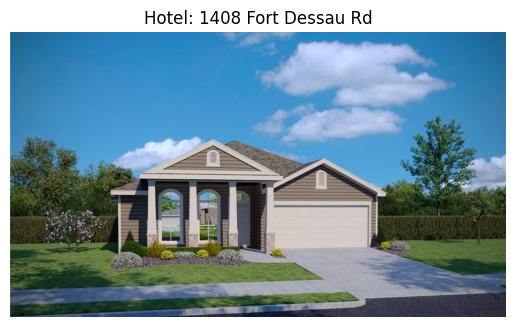

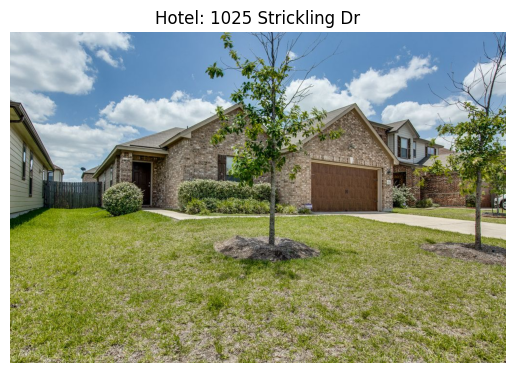

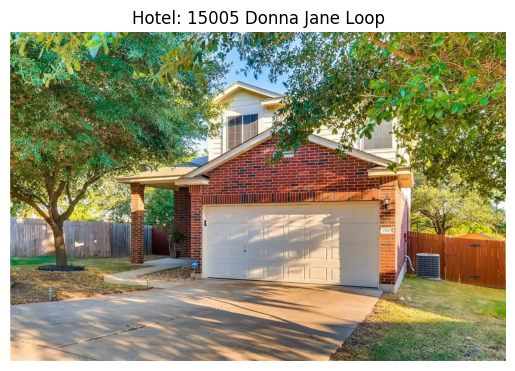

In [19]:
from PIL import Image
import matplotlib.pyplot as plt

# Отображение изображений для первых 5 отелей в DataFrame df_dropped
for index, row in df_dropped.head(5).iterrows():
    image_path = row['image_path']
    if image_path:
        img = Image.open(image_path)
        plt.figure()
        plt.imshow(img)
        plt.title(f"Hotel: {row['streetAddress']}")
        plt.axis('off')
        plt.show()

# Практическая работа 2.2. Визуализация ориентированных ациклических графов (DAG)

- `DASK` использует библиотеку `Graviz` для создания визуального представления групп `DAG`, созданных планировщиком.

- и спользуйте метод `.visualize()` для проверки групп `DAG DataFrames`, `Series`, `Bag` и массивов.

Для упрощения будем использовать объект `Dask Delayed` вместо `DataFrames`, поскольку они становятся довольно большими и их трудно визуализировать.

- `Delayed` — это конструктор, который позволяет обертывать функции и создавать объекты `Dask Delayed`, эквивалентные узлу в `DAG`. Объединяя захваченные объекты, создаем группу доступа к данным.

Ниже приведены два примера: в первом  `DAG` только с одним узлом и зависимостями, а во втором  - `DAG` с несколькими узлами и зависимостями.

**Задание.**

`2.2.1.` Визуализировать `DAG` с одним узлом и зависимостями.

`2.2.1.` Визуализировать `DAG` с более чем одним узлом и зависимостями.



`2.1.1.` **Визуализировать `DAG` с одним узлом и зависимостями.**

In [20]:
# import library
import dask.delayed as delayed

In [23]:
from dask import visualize

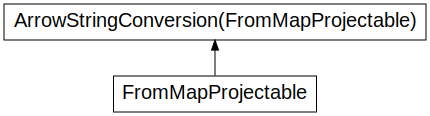

In [34]:
df.visualize()

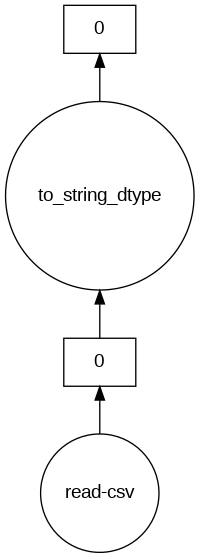

In [35]:
visualize(df)

Был построен DAG с одним узлом и зависимостями 2 сопособами. .visualize() даёт более простой синтаксис, не фисирует промежуточные результаты, при этом visualize() подходит для визуализации нескольких объектов одновременно и показывает промежуточные результаты, которые из-за ленивых вычислений равны 0. Элементы ArrowStringConversion и FromMapProjectable на изображении описывают процесс извлечения и преобразования данных.

`2.2.2.` **Визуализировать `DAG` с более чем одним узлом и зависимостями.**

построить более сложную группу `DAG` с двумя уровнями:

- `Layer1` создается путем циклического перебора списка данных  в ​`​dask` . Этот слой объединяет ранее созданное приращение функции со значениями в списке, а затем использует встроенное суммирование функции для объединения результатов;

- `Layer2` построен циклически для каждого объекта, созданного в `Layer1`.

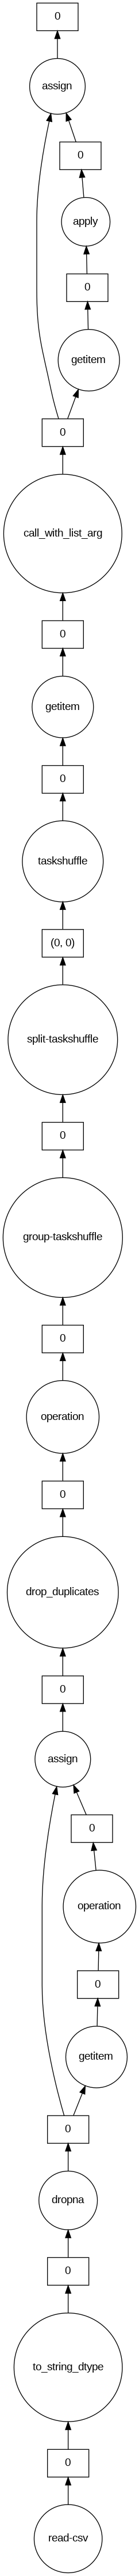

In [33]:
visualize(df_dropped)

Файл загружается с помощью read_csv, удаляются нулевые значения, операции присваивания значения и другие операции представлены на схеме. Граф завершается операциями присваивания (assign) и финальными вычислениями. Нули или пустые значения в графе — это просто часть представления операций, и они не влияют на конечный результат.